# Plotting Atmospheric data from EBAS

#### Requirements: 
- Python (Anaconda recommended)
- IDE / Text editor that can handle Jupyter Notebooks
- Packages:
    - pandas
    - nappy
    - matplotlib
- System:
    - Tested on Windows and on Ubuntu (WSL2)

#### Other:
- Source for the data: http://ebas-data.nilu.no/Default.aspx
- The site can be a bit slow and it doesn't handle large requests too well

In [46]:
import nappy as nap
import pandas as pd
from datetime import datetime as dt

In [47]:
#paths to downloaded files (number varies depending on chosen data)
# here we chose Finland -> Hyytiälä -> cloud_condensation_nuclei_number_concentration
file1 = "FI0050R.20130101020000.20171020000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file2 = "FI0050R.20140101020000.20171018000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file3 = "FI0050R.20150101020000.20171018000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file4 = "FI0050R.20160101020000.20171018000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file5 = "FI0050R.20170101020000.20180111000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file6 = "FI0050R.20180101020000.20190307000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.12mo.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file7 = "FI0050R.20190101020000.20200428000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file8 = "FI0050R.20200101020000.20210414000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.1y.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"
file9 = "FI0050R.20210101020000.20220527000000.CCNC.cloud_condensation_nuclei_number_concentration.pm10.50w.4h.FI03L_DMT_CCN-100_HYY.FI03L_CCNC.lev2.nas"

In [48]:
#files to a list
file_list = [file1, file2, file3, file4, file5, file6, file7, file8, file9]

In [49]:
#open as Xarray DataArrays
da_list = [nap.readXarrayObjectsFromNA(file) for file in file_list]

In [50]:
#convert the desired data into a Pandas DataFrame for easier usage. Also convert date to datetime64[ns] with the help of the file name (which should include the date as the second element)
#usually da[0][0] = time, da[0][1] mean, da[0][2] = uncertainty, ...(repeating with different percentiles)
df_list = [pd.DataFrame(data=da[0][1], columns=["Data"], index=pd.to_datetime(da[0][0], unit='D', origin=pd.Timestamp(file.split(".")[1]))) for da, file in zip(da_list, file_list)]

In [51]:
#concatenate individual DataFrames into a single one
df = pd.concat(df_list)
#this filters out invalid values (usually 9999.0). Depending on the data you may comment this out or change the value
df = df.where(df<9999.0, 0)

<AxesSubplot:title={'center':'Cloud condensation nuclei number concentration'}, xlabel='Date [years]', ylabel='Concentration [1/cm^-3]'>

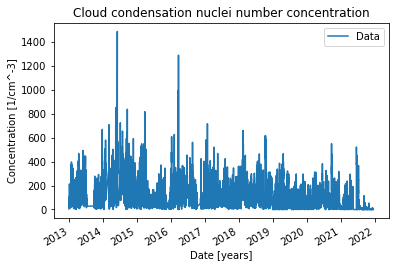

In [52]:
#plot the data, add title
df.plot(title="Cloud condensation nuclei number concentration", xlabel="Date [years]", ylabel="Concentration [1/cm^-3]")